In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (11.0, 9.0)
%matplotlib inline

In [2]:
train = pd.read_csv('training.csv', low_memory=False)
test = pd.read_csv('predict.csv', low_memory=False)

In [3]:
# dividing into numerical and categorical 
cat = train.select_dtypes(include=['object'])
num = train.select_dtypes(exclude=['object'])

In [4]:
train['participant2_influence'].describe()

count    9418.000000
mean        0.757421
std         0.355775
min         0.090910
25%         0.230770
50%         0.996450
75%         0.998660
max         0.999620
Name: participant2_influence, dtype: float64

In [61]:
train.columns

Index(['id', 'posted_time', 'updated_time', 'age', 'updated_age', 'app_type',
       'owner_id', 'owner_type', 'owner_influence', 'number_of_likes',
       'number_of_comments', 'reactivity', 'is_mentions_me',
       'is_mentions_connections', 'is_commented_by_me',
       'is_commented_by_connections', 'is_liked_by_me',
       'is_liked_by_connections', 'poster_id', 'poster_gender',
       'poster_is_employee', 'poster_is_lead', 'poster_is_in_connections',
       'poster_focus', 'poster_order', 'poster_influence', 'participant1_id',
       'participant1_action', 'participant1_gender',
       'participant1_is_employee', 'participant1_is_lead',
       'participant1_is_in_connections', 'participant1_focus',
       'participant1_order', 'participant1_influence', 'participant2_id',
       'participant2_action', 'participant2_gender',
       'participant2_is_employee', 'participant2_is_lead',
       'participant2_is_in_connections', 'participant2_focus',
       'participant2_order', 'partici

In [62]:
combinations = [ ('is_liked_by_connections', 'participant1_influence'),
                 ('participant1_influence', 'participant2_influence'),
                 ('participant2_influence', 'participant3_influence'), 
                 ('participant3_influence', 'participant4_influence'), 
                 ('participant4_influence', 'participant5_influence'),
                 ('participant4_influence', 'participant4_is_employee'),
                 ('is_commented_by_connections', 'number_of_comments'),
                 ('poster_influence', 'poster_is_employee'),
                 ('is_liked_by_connections', 'number_of_likes'),
                 ('number_of_likes', 'participant3_influence'), 
                 ('participant5_is_employee', 'participant5_influence'), 
                 ('reactivity', 'owner_influence')]

In [63]:
def plot_two(combination, ds):
    print('\n', combination)
    fig = plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.distplot(ds[combination[0]])
    plt.grid()
    plt.subplot(1, 2, 2)
    sns.distplot(ds[combination[1]])
    plt.grid()
    plt.show()


 ('is_liked_by_connections', 'participant1_influence')


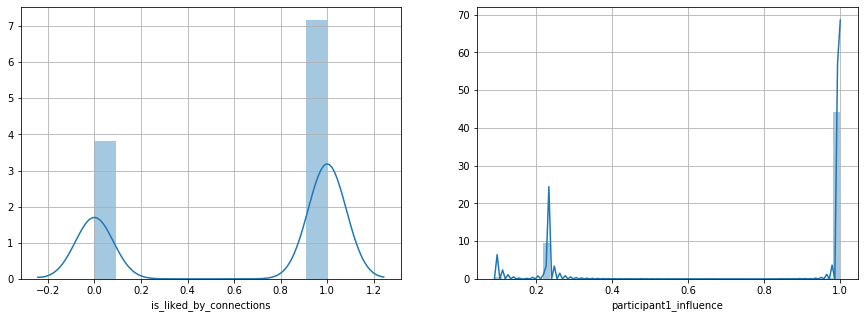


 ('participant1_influence', 'participant2_influence')


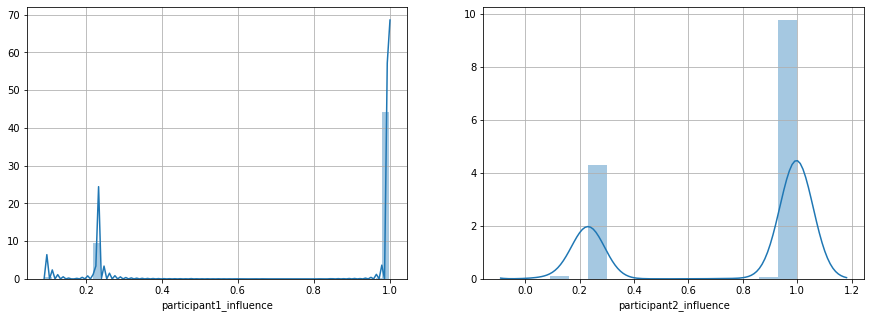


 ('participant2_influence', 'participant3_influence')


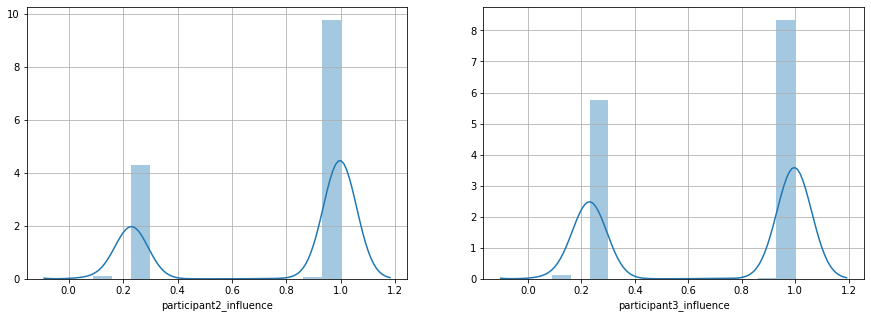


 ('participant3_influence', 'participant4_influence')


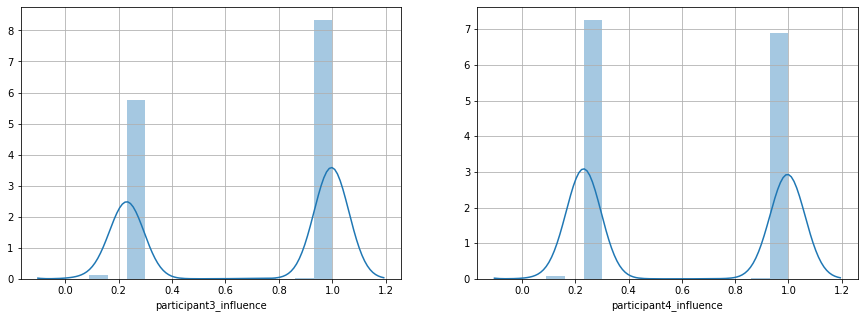


 ('participant4_influence', 'participant5_influence')


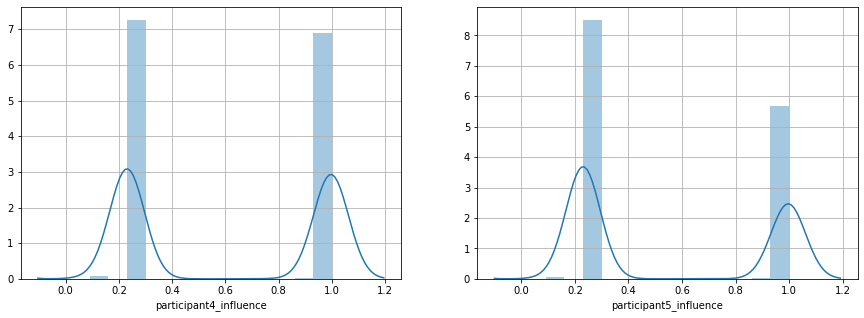


 ('participant4_influence', 'participant4_is_employee')


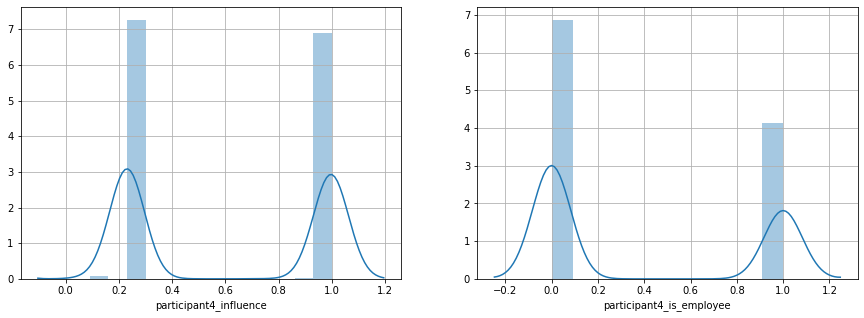


 ('is_commented_by_connections', 'number_of_comments')


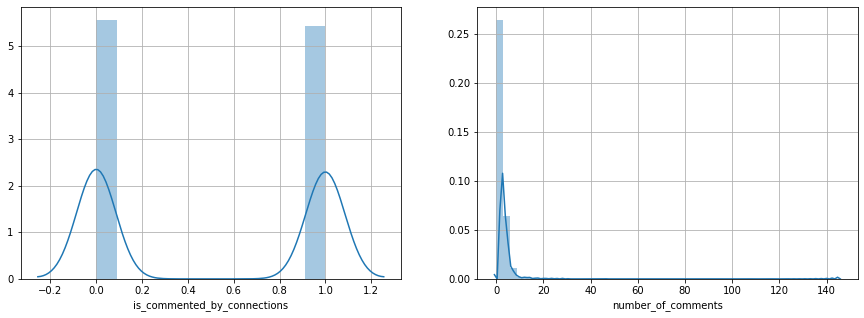


 ('poster_influence', 'poster_is_employee')


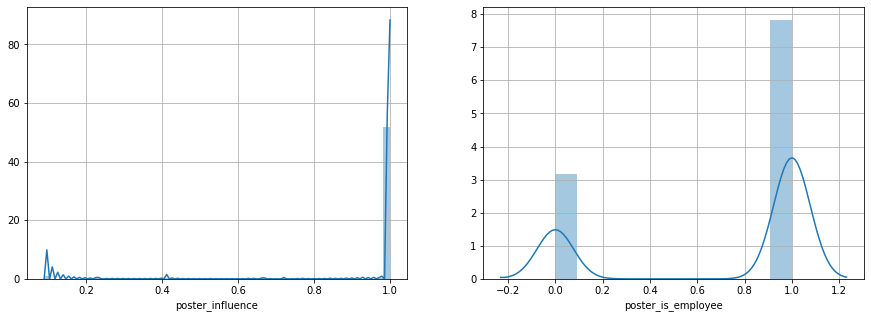


 ('is_liked_by_connections', 'number_of_likes')


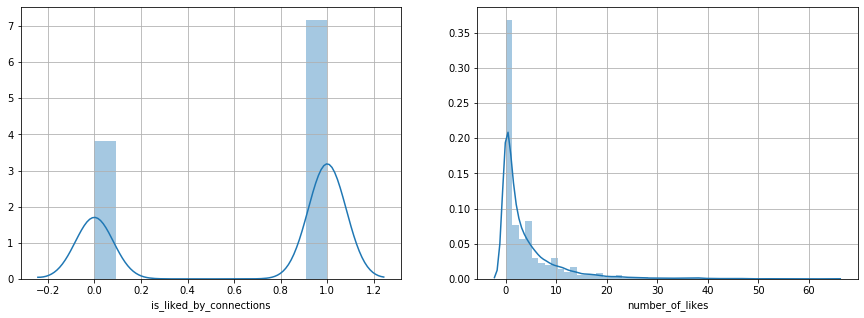


 ('number_of_likes', 'participant3_influence')


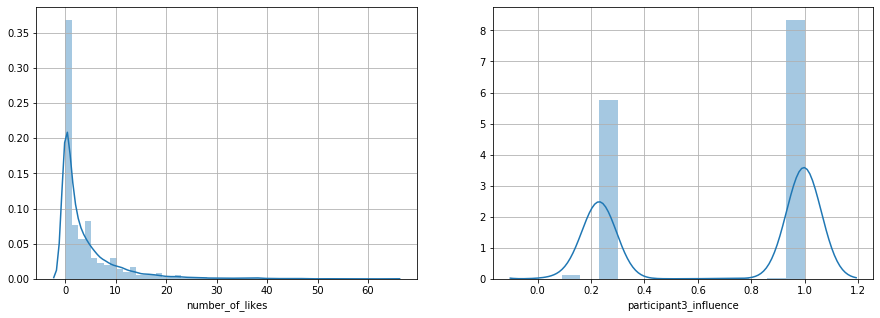


 ('participant5_is_employee', 'participant5_influence')


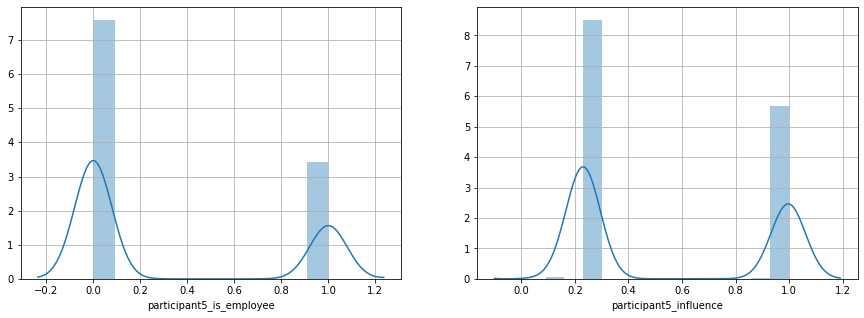


 ('reactivity', 'owner_influence')


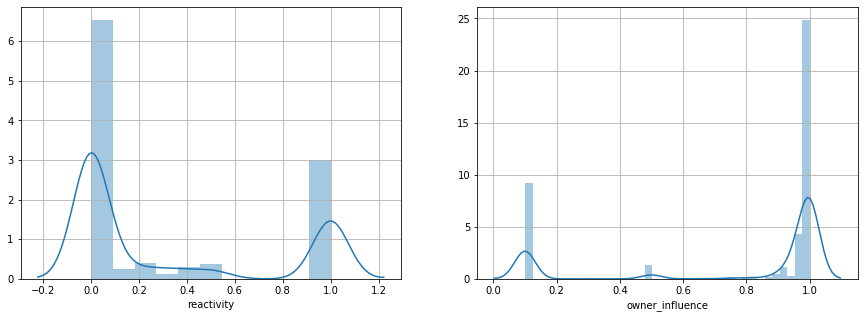

In [64]:
for combination in combinations:
    plot_two(combination, train)

### Statistical analysis
----------------------------
####  *  (__'is_liked_by_connections'__  and  __'participant1_influence'__)  --  V ( even better for 2-5 participants);
#### * (__'participantN_influence'__ and __'participant(N+1) influence'__)  -- V (for N = 1, 2, 3, 4) ;
#### * (__'participant4_influence'__ and __'participant4_is_employee'__)  --  V ( can try for other participants);
#### * (__'is_commented_by_connections'__ and '__number_of_comments'__) -- NO (completely different distributions)
#### * (__'poster_influence'__ and __'poster_is_employee'__) -- can try (but distribution of poster_influence is weird)
#### most of posters has 0.99 influence and are employees!
#### * (__'is_liked_by_connections'__ and __'number_of_likes'__) -- NO (except of number of likes will be converted or normalized (0.01 = 100) 
#### * (__'number_of_likes'__ and __'participant3_influence'__) -- NO (again if number_of_likes is converted)
#### * (__'participant5_is_employee'__ (0/1)  and  __'participant5_influence'__ (0-1)) -- V
#### * (__'reactivity'__ and __'owner_influence'__) -- ??? reactivity has a bit different distribution (plus no hands on it)